In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tweets_df = pd.read_csv('/content/train.csv')

In [3]:
# 0 indicates positive sentiment, 1 indicates negative sentiment
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
19995,19996,0,spoke too soon! my wallpaper is here! know wha...
19996,19997,0,@user jacuzzi &amp; pay-timeð #spain#marbe...
19997,19998,0,jwu streetdance workshop later + no classes ...
19998,19999,0,well. i think it's just the whole damn next ch...


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   label   20000 non-null  int64 
 2   tweet   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [5]:
tweets_df.drop('id',axis=1, inplace=True)

In [6]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
19995,0,spoke too soon! my wallpaper is here! know wha...
19996,0,@user jacuzzi &amp; pay-timeð #spain#marbe...
19997,0,jwu streetdance workshop later + no classes ...
19998,0,well. i think it's just the whole damn next ch...


In [7]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
19995    spoke too soon! my wallpaper is here! know wha...
19996     @user jacuzzi &amp; pay-timeð #spain#marbe...
19997    jwu streetdance workshop later + no classes   ...
19998    well. i think it's just the whole damn next ch...
19999    i bought #emojis so we don't have to speak to ...
Name: tweet, Length: 20000, dtype: object

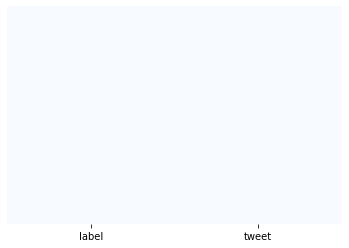

In [8]:
#visualizing tweets with value = NULL
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues") 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f945006b110>]],
      dtype=object)

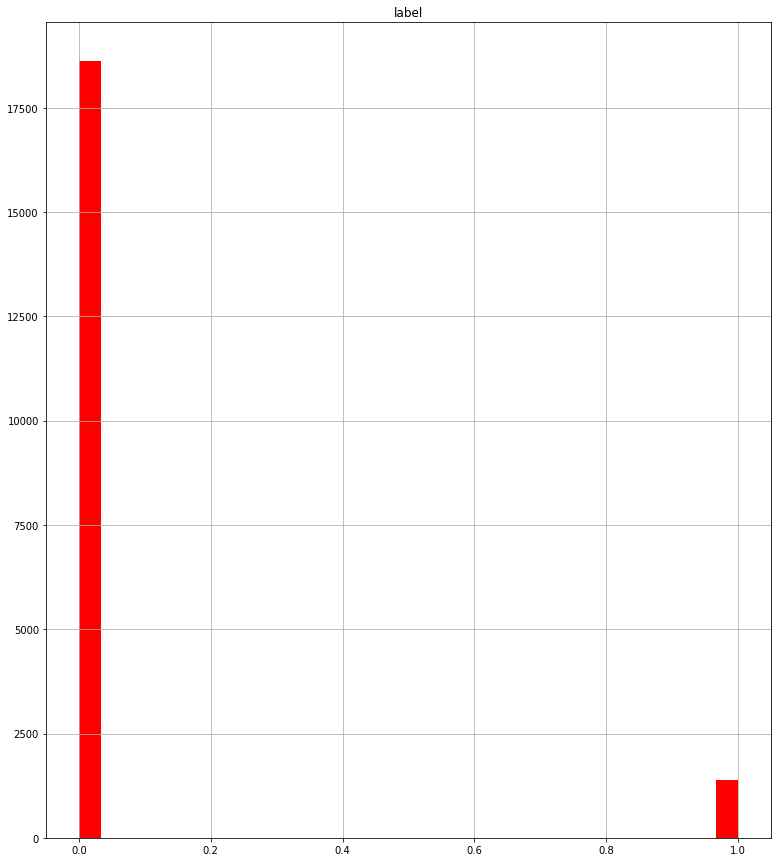

In [9]:
tweets_df.hist(bins=30, figsize = (13,15), color = 'r')

As we can see, only a small number of the tweets in our dataset indicates negative sentiment (Imbalanced dataset).

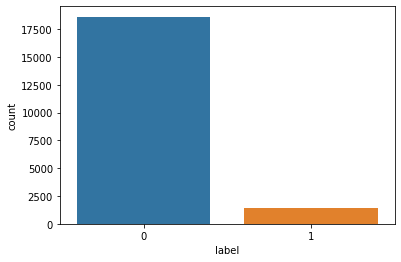

In [10]:
sns.countplot(x = tweets_df['label'])

In [11]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [12]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
19995,0,spoke too soon! my wallpaper is here! know wha...,131
19996,0,@user jacuzzi &amp; pay-timeð #spain#marbe...,127
19997,0,jwu streetdance workshop later + no classes ...,54
19998,0,well. i think it's just the whole damn next ch...,137


In [14]:
tweets_df.describe()

,label,length
count,20000.000000,20000.000000
mean,0.069250,84.820550
std,0.253885,29.355186
min,0.000000,12.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,107.000000
max,1.000000,274.000000


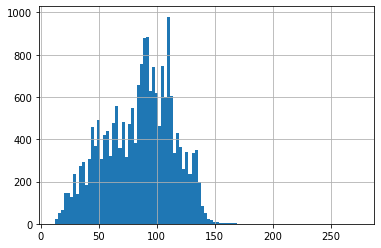

In [15]:
tweets_df['length'].hist(bins=100)

In [16]:
tweets_df[tweets_df['length'] == tweets_df['length'].min()]

,label,tweet,length
3397,1,shut up rat,12
4411,0,no 1 is up,12
9130,0,got this on,12
13172,0,my king k,12
18996,0,! shit sad,12


In [13]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
19995,0,spoke too soon! my wallpaper is here! know wha...,131
19996,0,@user jacuzzi &amp; pay-timeð #spain#marbe...,127
19997,0,jwu streetdance workshop later + no classes ...,54
19998,0,well. i think it's just the whole damn next ch...,137


In [14]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
19949,1,a reson why so many muslims might be,39
19966,1,@user @user @user says a president elect that ...,89
19975,1,#thanks to all those #dead #white #dudes from...,107
19987,1,we live in a country where many think this fir...,105


In [15]:
sentences = tweets_df['tweet'].tolist()

In [16]:
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [17]:
len(sentences)

20000

In [18]:
sentences_as_one_string = " ".join(sentences)

In [19]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [20]:
#!pip install wordcloud

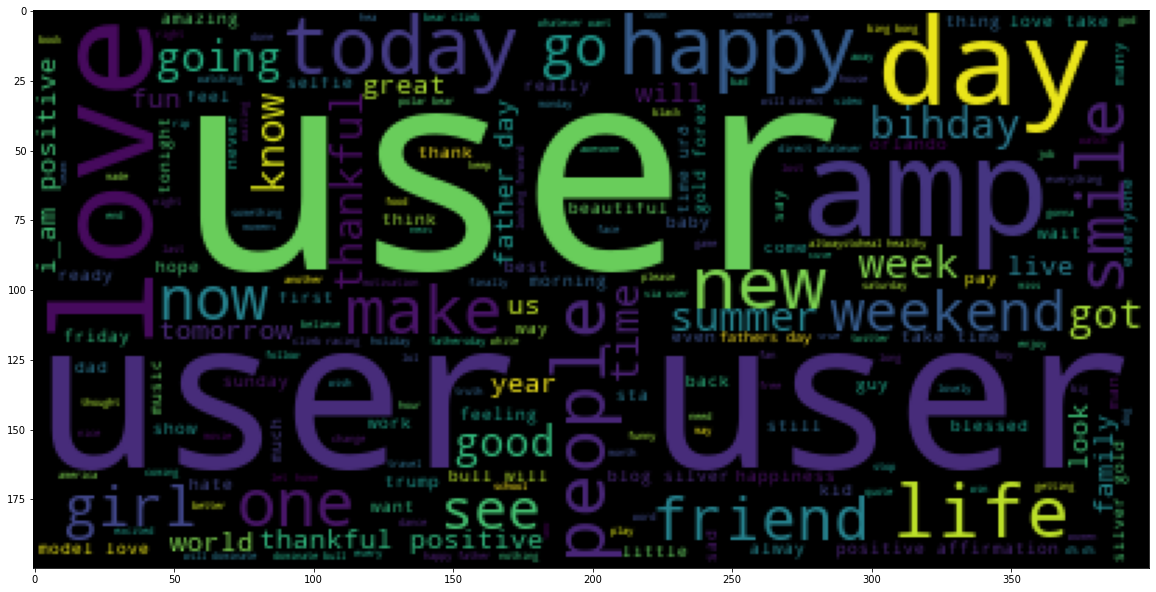

In [21]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

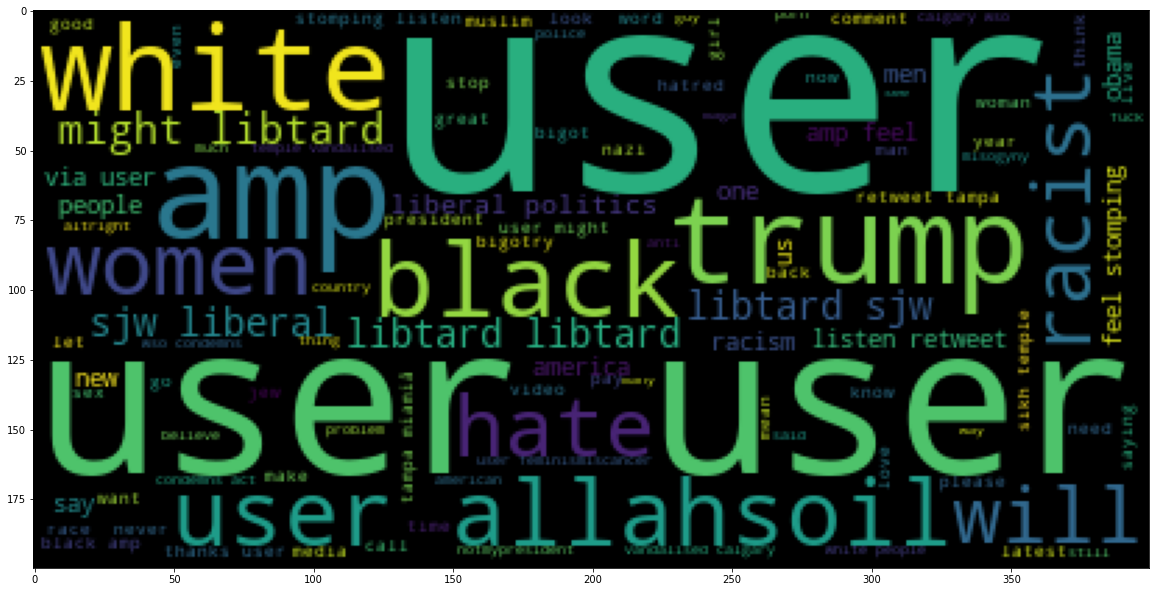

In [22]:
#generating the word cloud of only the negative sentiment tweets
negative_list = negative['tweet'].tolist()
negative_list_string = " ".join(negative_list)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_list_string))

# Data Cleaning 

## 1. Removing Punctuation

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test = "! hi ! i am Tanishka :) holaaa {|}"

In [25]:
Test_clean  = [char for char in Test if char not in string.punctuation] #list comprehension
Test_clean_string = "".join(Test_clean)
Test_clean_string

' hi  i am Tanishka  holaaa '

## 2. Stop Words

In [26]:
import nltk #natural language tool kit 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
Test_cleanest_list = [word for word in Test_clean_string.split() if word.lower() not in stopwords.words('english')]
Test_cleanest_string = " ".join(Test_cleanest_list)
Test_cleanest_string

'hi Tanishka holaaa'

In [29]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'
mini_punc = [char for char in mini_challenge if char not in string.punctuation]
mini_punc = "".join(mini_punc)
mini_punc = [word for word in mini_punc.split() if word.lower() not in stopwords.words('english')]
mini_punc = " ".join(mini_punc)
mini_punc

'mini challenge teach remove stopwords punctuations'

## Count Vectorization (Tokenization)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.', 'This paper is the second paper.', 'This is the third one']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [34]:
# gets all the unique words in sample data
print(vectorizer.get_feature_names())

['first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [35]:
print(X.toarray())

[[1 1 0 1 0 1 0 1]
 [0 1 0 2 1 1 0 1]
 [0 1 1 0 0 1 1 1]]


## Incorporating everything into the Model

In [30]:
def message_cleaning(message):
    digits = '0123456789'
    message = [char for char in message if char not in string.punctuation if char not in digits]
    message_string = "".join(message)
    message_cleaned = [word for word in message_string.split() if word.lower() not in stopwords.words('english')]
    return message_cleaned

In [37]:
#tweets_df['cleaned_messages'] = tweets_df['tweet'].apply(message_cleaning)

In [38]:
#tweets_df['cleaned_messages'][5]

['huge',
 'fan',
 'fare',
 'big',
 'talking',
 'leave',
 'chaos',
 'pay',
 'disputes',
 'get',
 'allshowandnogo']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning).fit_transform(tweets_df['tweet'])

In [32]:
tweets_countvectorizer.shape

(20000, 33478)

In [33]:
x = tweets_countvectorizer.toarray()

In [34]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
y = tweets_df['label']

In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: label, Length: 20000, dtype: int64

##Naive Bayes Classifier

In [37]:
x.shape

(20000, 33478)

In [38]:
y.shape

(20000,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [40]:
X_train.shape

(16000, 33478)

In [41]:
X_test.shape

(4000, 33478)

In [42]:
y_train.shape

(16000,)

In [43]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Assess Trained Model Performance

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

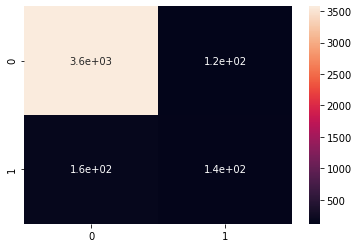

In [48]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3693
           1       0.55      0.47      0.51       307

    accuracy                           0.93      4000
   macro avg       0.75      0.72      0.74      4000
weighted avg       0.93      0.93      0.93      4000

